This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [28]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [29]:
folder = '1_7_19_P01_region_dependent_MPT'
bucket = 'mckenna.data'
#experiment = 'test' #Used for naming purposes. Should exclude XY and well information

#vids = 2
to_track = []
labels = []
frames = 651
fps = 100.02
umppx = 0.07
vids = 5

inflams = ['PAM']
hemis = ['contra', 'ipsi']
regions = ['cc', 'cortex']

for inflam in inflams:
    for hemi in hemis:
        for region in regions:
            for num in range(1, vids+1):
        #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                to_track.append('{}_{}_{}_vid_{}'.format(inflam, hemi, region, '%01d' % num))

to_track

['PAM_contra_cc_vid_1',
 'PAM_contra_cc_vid_2',
 'PAM_contra_cc_vid_3',
 'PAM_contra_cc_vid_4',
 'PAM_contra_cc_vid_5',
 'PAM_contra_cortex_vid_1',
 'PAM_contra_cortex_vid_2',
 'PAM_contra_cortex_vid_3',
 'PAM_contra_cortex_vid_4',
 'PAM_contra_cortex_vid_5',
 'PAM_ipsi_cc_vid_1',
 'PAM_ipsi_cc_vid_2',
 'PAM_ipsi_cc_vid_3',
 'PAM_ipsi_cc_vid_4',
 'PAM_ipsi_cc_vid_5',
 'PAM_ipsi_cortex_vid_1',
 'PAM_ipsi_cortex_vid_2',
 'PAM_ipsi_cortex_vid_3',
 'PAM_ipsi_cortex_vid_4',
 'PAM_ipsi_cortex_vid_5']

In [27]:
geomean = {}
geostd = {}
for gel in exps:
    #aws.download_s3('{}/geomean_{}.csv'.format(folder, gel), 'geomean_{}.csv'.format(gel), bucket_name=bucket)
    geomean[gel] = np.genfromtxt('geomean_{}.csv'.format(gel))
    geostd[gel] = np.genfromtxt('geoSEM_{}.csv'.format(gel))
    print('Diffusion Coefficient of {} % gel: {}'.format(gel, np.round(np.exp(geomean[gel][100])/4, 2)))
    print('Range: {} - {}'.format(np.round(np.exp(geomean[gel][100] - 1.96*geostd[gel][100])/4, 2), np.round(np.exp(geomean[gel][100] + 1.96*geostd[gel][100])/4, 2)))

Diffusion Coefficient of LPS_contra_cc % gel: 0.58
Range: 0.55 - 0.61
Diffusion Coefficient of LPS_ipsi_cc % gel: 0.62
Range: 0.57 - 0.66
Diffusion Coefficient of LPS_contra_cortex % gel: 0.29
Range: 0.27 - 0.31
Diffusion Coefficient of LPS_ipsi_cortex % gel: 0.24
Range: 0.22 - 0.26


In [35]:
geomean = {}
geostd = {}
for gel in exps:
    #aws.download_s3('{}/geomean_{}.csv'.format(folder, gel), 'geomean_{}.csv'.format(gel), bucket_name=bucket)
    geomean[gel] = np.genfromtxt('geomean_{}.csv'.format(gel))
    geostd[gel] = np.genfromtxt('geoSEM_{}.csv'.format(gel))
    print('Diffusion Coefficient of {} % gel: {}'.format(gel, np.round(np.exp(geomean[gel][100])/4, 2)))
    print('Range: {} - {}'.format(np.round(np.exp(geomean[gel][100] - 1.96*geostd[gel][100])/4, 2), np.round(np.exp(geomean[gel][100] + 1.96*geostd[gel][100])/4, 2)))

Diffusion Coefficient of PAM_contra_cc % gel: 0.36
Range: 0.34 - 0.38
Diffusion Coefficient of PAM_ipsi_cc % gel: 0.62
Range: 0.58 - 0.65
Diffusion Coefficient of PAM_contra_cortex % gel: 0.27
Range: 0.25 - 0.29
Diffusion Coefficient of PAM_ipsi_cortex % gel: 0.58
Range: 0.55 - 0.62


In [30]:
experiment = 'regional'
slices, bins, well_names = msd.binning(to_track, wells = 4, prefix=experiment)
bins

{'regional_W0': ['PAM_contra_cc_vid_1',
  'PAM_contra_cc_vid_2',
  'PAM_contra_cc_vid_3',
  'PAM_contra_cc_vid_4',
  'PAM_contra_cc_vid_5'],
 'regional_W1': ['PAM_contra_cortex_vid_1',
  'PAM_contra_cortex_vid_2',
  'PAM_contra_cortex_vid_3',
  'PAM_contra_cortex_vid_4',
  'PAM_contra_cortex_vid_5'],
 'regional_W2': ['PAM_ipsi_cc_vid_1',
  'PAM_ipsi_cc_vid_2',
  'PAM_ipsi_cc_vid_3',
  'PAM_ipsi_cc_vid_4',
  'PAM_ipsi_cc_vid_5'],
 'regional_W3': ['PAM_ipsi_cortex_vid_1',
  'PAM_ipsi_cortex_vid_2',
  'PAM_ipsi_cortex_vid_3',
  'PAM_ipsi_cortex_vid_4',
  'PAM_ipsi_cortex_vid_5']}

In [31]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
#     aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
#     aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
#     geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
#     gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
                                                                remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with PAM_contra_cc_vid_1
Done with PAM_contra_cc_vid_2
Done with PAM_contra_cc_vid_3
Done with PAM_contra_cc_vid_4
Done with PAM_contra_cc_vid_5
Done with PAM_contra_cortex_vid_1
Done with PAM_contra_cortex_vid_2
Done with PAM_contra_cortex_vid_3
Done with PAM_contra_cortex_vid_4
Done with PAM_contra_cortex_vid_5
Done with PAM_ipsi_cc_vid_1
Done with PAM_ipsi_cc_vid_2
Done with PAM_ipsi_cc_vid_3
Done with PAM_ipsi_cc_vid_4
Done with PAM_ipsi_cc_vid_5
Done with PAM_ipsi_cortex_vid_1
Done with PAM_ipsi_cortex_vid_2
Done with PAM_ipsi_cortex_vid_3
Done with PAM_ipsi_cortex_vid_4
Done with PAM_ipsi_cortex_vid_5


In [32]:
exps = []
for inflam in inflams:
    for region in regions:
        for hemi in hemis:
            to_avg = []
            for sample in to_track:
                combi = '{}_{}_{}'.format(inflam, hemi, region)
                if combi in sample:
                    to_avg.append(sample)

            weights, wh1 = msd.precision_weight(to_avg, gSEM)
            geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                              bucket=bucket, folder=folder, experiment=combi)
            exps.append(combi)

In [33]:
exps

['PAM_contra_cc', 'PAM_ipsi_cc', 'PAM_contra_cortex', 'PAM_ipsi_cortex']

Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

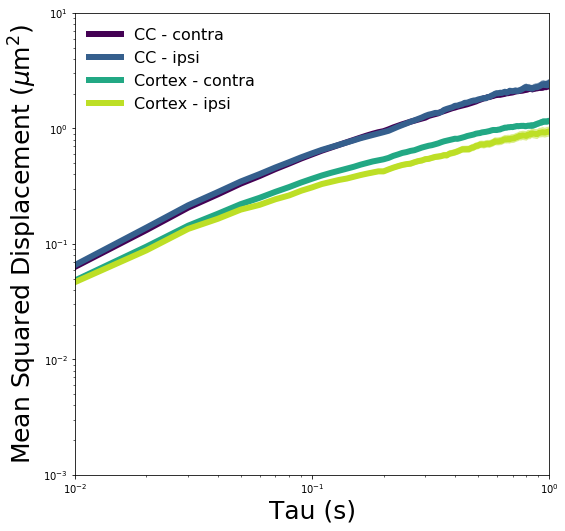

In [19]:
msd.plot_all_experiments(exps,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder,
                         labels = ['CC - contra',
                                   'CC - ipsi',
                                   'Cortex - contra',
                                   'Cortex - ipsi'])

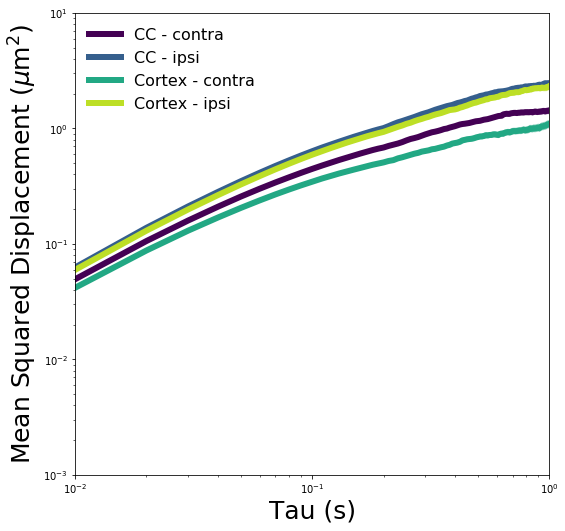

In [34]:
msd.plot_all_experiments(exps,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder,
                         labels = ['CC - contra',
                                   'CC - ipsi',
                                   'Cortex - contra',
                                   'Cortex - ipsi'])

In [ ]:
msd.plot_all_experiments(to_track[0:10], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[10:20], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[20:30], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[30:40], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[40:50], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[50:60], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[60:70], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[70:80], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[80:90], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [ ]:
msd.plot_all_experiments(to_track[90:100], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)